<h2><b>Spotify Most Streamed Songs</b></h2>

This Jupyter Notebook was created based on a initial study's cicle of Data Science
and has as the main objective analyze the 'Spotify Most Streamed Songs' dataset 
using Python CSV reader and Matplotlib library.

In [ ]:
# Here we will use the csv library to acess the dataset 

import csv

path = "archive/Spotify Most Streamed Songs.csv"

In [ ]:
# In this step we are going to use csv as the main library and using a DictReader 

with open(path, newline= '') as csvfile:
    reader = csv.DictReader(csvfile)
    
    fields = []
    fields = next(reader) # Take the heads of each column

    data_list = []  # Create a dictionary to acess the informations by keys
    for row in reader:
        data_list.append(row)


<h3><b> Basic statistical analysis </b></h3>

<lo>
<li> Most Streamed song </li>
<li> Stream's Medium </li>
<li> Stream's Mean </li>
<li> Stream's Mode </li>
</lo>


In [121]:
# Now we can use the dictionary to find the most streamed song, mean, medium and mode 

count_sum = 0
count_best = 0
best_name = ''
count_medium = 0
count_mean = []
count_mode = []
size = len(data_list)

# Let's calculate the total sum, best and medium of streams 

for i in range(size):
        
    value = data_list[i]['streams']
    v = 1
    text_problem = 'abcdefghijklmnopqrstuvwxyz'
    
    for j in range(len(text_problem)):
        if(text_problem[j] in value):
            v = 0
        
    if(v):

        count_sum += int(value)
        count_mean.append(int(value))
        count_mode.append(int(value))

        if(int(value) > count_best):
            count_best = int(value)
            best_name = data_list[i]['track_name']
        
        
count_medium = count_sum/size


In [122]:
print('The Most Streamed Song has',format(int(count_best), ',').replace(',', '.'), 'streams and is called',best_name)
print('The Streams Medium is', format(int(count_medium), ',').replace(',', '.'),'billions')

The Most Streamed Song has 3.703.895.074 streams and is called Blinding Lights
The Streams Medium is 513.988.914 billions


In [123]:
# Calculate mean 

co_mean = count_mean.copy()
co_mean.sort()
size = len(co_mean)
val = size%2

if (val == 1):
    c_mean = co_mean[int((size/2))]


elif (val == 0):
    c_1 = co_mean[(int((size/2)))]
    c_2 = co_mean[(int((size/2))+1)]

    c_mean = co_mean[int(((c_1 + c_2)/2))]


In [124]:
print('The Streams Mean is', format(c_mean, ',').replace(',', '.'),'billions')

The Streams Mean is 290.833.204 billions


In [125]:
# Calculate mode

store = {}

for i in range(len(count_mode)):

    if (count_mode[i] not in store.keys()):
        store[count_mode[i]] = 1

    elif (count_mode[i] in store.keys()):
        store[count_mode[i]] += 1

c_mode = 1
number = 0

for item in store:
    if (store[item] > c_mode):
        c_mode = store[item]
        number = item


In [126]:
if (c_mode != 1):

    # In this case, if there is a different number that has the same c_mode, the algorithm references the first one that appears
    print('The Streams Mode is', format(number, ',').replace(',', '.'),'billion')  

else:
    print('Streams Mode doesnt exists')

The Streams Mode is 156.338.624 billion


<h3><b>Specific statistical questions with MatPlotLib</b></h3>

<lo>
<li>Who are the top 5 artists that appear in the dataset?</li>
<li>What was the top music of each year during the last decade?</li>
<li>Is that a relation between bpm, streams and valence?</li>
<li>Songs that appear the most in Spotify playlists are related to energy and danceability?</li>
</lo>

In [127]:
# Importing the library

import matplotlib.pyplot as plt

In [128]:
# Who are the top 5 artists that appear in the dataset?

artists = {}

for i in range(len(data_list)):
    
    if(',' in data_list[i]['artist(s)_name']):
        new_data = data_list[i]['artist(s)_name'].split(', ')
    
    else:
        new_data = []
        new_data.append(data_list[i]['artist(s)_name'])
    
  
    for i in range(len(new_data)):
             
        if (new_data[i] not in artists.keys()):
            artists[new_data[i]] = 1

        elif (new_data[i] in artists.keys()):
            artists[new_data[i]] += 1


sorted_artist = dict(sorted(artists.items(), key= lambda item: item[1], reverse= True))

x = []
y = []
c = 0

for item in sorted_artist:

    y.append(sorted_artist[item])
    x.append(item)
    c+=1 

    if(c == 5):
       break

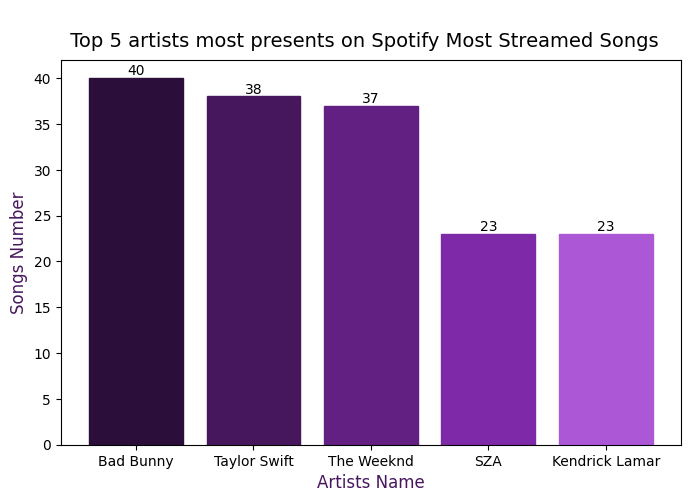

In [129]:
# Graphs to visualize

fig = plt.figure(figsize=(8,5))
ax = fig.subplots()
bars = ax.bar(x,y, color=('#9932CC'), edgecolor=('#882EB6'))

# Colors to bars 

color_bar = ['#2B0E39', '#47175E', '#622083', '#7E29A8', '#AC57D6']

for i in range(len(color_bar)):
    bars[i].set_color(color_bar[i])

# Titles and texts

fig.suptitle('\n Top 5 artists most presents on Spotify Most Streamed Songs', fontsize= 14)
ax.set_xlabel('Artists Name', fontsize = 12, color=('#47175E'))
ax.set_ylabel('Songs Number',fontsize= 12, color=('#47175E'))

plt.text('Bad Bunny',40, '40', ha= 'center', va='bottom')
plt.text('Taylor Swift',38, '38', ha= 'center', va='bottom')
plt.text('The Weeknd',37, '37', ha= 'center', va='bottom')
plt.text('SZA',23, '23', ha= 'center', va='bottom')
plt.text('Kendrick Lamar',23, '23', ha= 'center', va='bottom')

plt.show()

In [130]:
# What was the top music of each year during the last decade?

year_stream = {}
song_year = {}

for i in range(len(data_list)):
        
    value = data_list[i]['streams']
    ver = 1
    text_problem = 'abcdefghijklmnopqrstuvwxyz'
    
    for j in range(len(text_problem)):

        if(text_problem[j] in value):
            ver = 0
    
    if(ver):

        if (data_list[i]['released_year'] not in year_stream.keys()):
            year_stream[data_list[i]['released_year']] = value
            song_year[data_list[i]['released_year']] = data_list[i]['track_name']

        elif (data_list[i]['released_year'] in year_stream.keys() and int(value) > int(year_stream[data_list[i]['released_year']])):
            year_stream[data_list[i]['released_year']] = value
            song_year[data_list[i]['released_year']] = data_list[i]['track_name']



ord_year = dict(sorted(year_stream.items()))
ord_song = dict(sorted(song_year.items()))


x_1 = []
y_1 = []
decade = ['2013','2014','2015','2016','2017','2017','2018','2019','2020','2021','2022','2023']

for item in ord_song:
    if(item in decade):
        x_1.append(int(year_stream[item]))
        y_1.append(ord_song[item] + ' ('+ item +')')

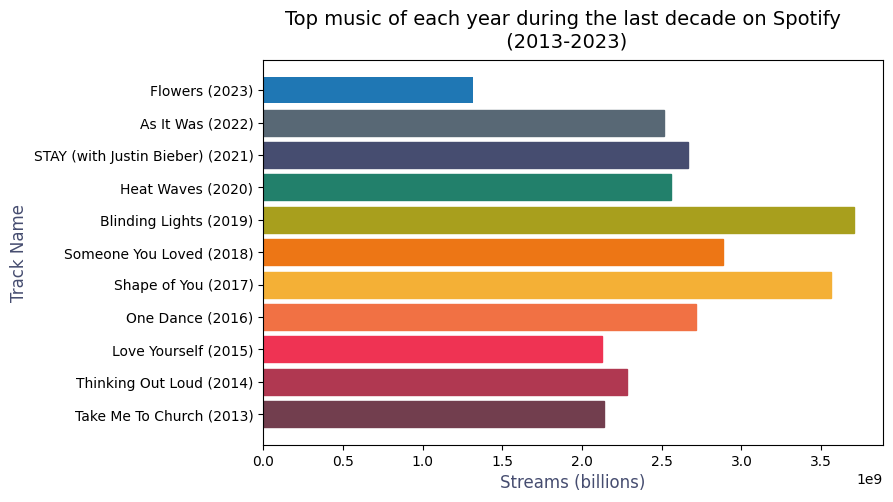

In [131]:
# Graphs to visualize

fig = plt.figure(figsize=(8,5))
ax = fig.subplots()
bars = ax.barh(y_1,x_1)

# Colors to bars 

color_bar = ['#723e4e', '#b03851', '#ef3353', '#f17144', '#f4b036', '#ed7615', '#a89f1d', '#22806b', '#464d70','#586875']

for i in range(len(color_bar)):
    bars[i].set_color(color_bar[i])

# Titles and texts

fig.suptitle('Top music of each year during the last decade on Spotify\n (2013-2023)', fontsize= 14)
ax.set_xlabel('Streams (billions)', fontsize = 12, color=('#464d70'))
ax.set_ylabel('Track Name',fontsize= 12, color=('#464d70'))

plt.show()

In [132]:
# Is that a relation between bpm, streams and valence?

bpm_d= []
streams_d = []
new_dance = []


for i in range(len(data_list)):
        
    streams_v = data_list[i]['streams']
    valence_v = data_list[i]['valence_%']
    bpm_v = data_list[i]['bpm']
    ver = 1
    text_problem = 'abcdefghijklmnopqrstuvwxyz'
    
    for j in range(len(text_problem)):

        if(text_problem[j] in streams_v):
            ver = 0
    
    if(ver):

        streams_d.append(int(streams_v))
        new_dance.append(int(valence_v))
        bpm_d.append(int(bpm_v))


In [133]:
import numpy as np

# Valences follow percent 0 - 100 %
energy = [0,21,41,61,81]

# Bpms - 10 numbers to min bpm to max bpm
bpms = np.linspace(min(bpm_d), max(bpm_d), 10)
bpms_n = []

# Choose the min of each interval
for i in range(0,10,2):
    bpms_n.append(int(bpms[i]))

# Streams 5 x 5 
mat = []
rep = [] # To avoid repeating numbers 

for j in range(5):
    
    counter = [0,0,0,0,0]
    lin = [0,0,0,0,0]

    for i in range(len(streams_d)):

        if(counter == [1,1,1,1,1]):
            break

        elif(bpm_d[i] >= bpms[0] and bpm_d[i] < bpms_n[1] and new_dance[i] >= energy[0] and new_dance[i] < energy[1] and streams_d[i] not in rep):
                lin[0] = streams_d[i]
                rep.append(streams_d[i])
                counter[0] = 1
        
        elif(bpm_d[i] >= bpms[1] and bpm_d[i] < bpms_n[2] and new_dance[i] >= energy[1] and new_dance[i] < energy[2] and streams_d[i] not in rep):
                lin[1]= streams_d[i]
                rep.append(streams_d[i])
                counter[1] = 1
        
        elif(bpm_d[i] >= bpms[2] and bpm_d[i] < bpms_n[3] and new_dance[i] >= energy[2] and new_dance[i] < energy[3] and streams_d[i] not in rep):
                lin[2] = streams_d[i]
                rep.append(streams_d[i])
                counter[2] = 1

        elif(bpm_d[i] >= bpms[3] and bpm_d[i] < bpms_n[4] and new_dance[i] >= energy[3] and new_dance[i] < energy[4] and streams_d[i] not in rep):
                lin[3]= streams_d[i]
                rep.append(streams_d[i])
                counter[3] = 1
        
        elif(bpm_d[i] >= bpms[4] and new_dance[i] >= energy[4] and streams_d[i] not in rep):
                lin[4] = streams_d[i]
                rep.append(streams_d[i])
                counter[4] = 1

    mat.append(lin)

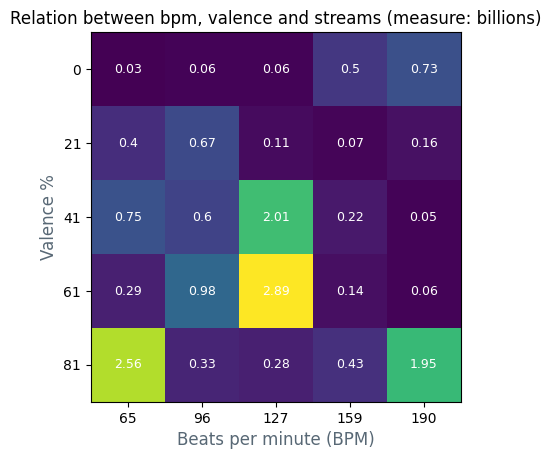

In [134]:
#Graph with HeatMap

fig, ax = plt.subplots()
im = ax.imshow(mat)
ax.set_title('Relation between bpm, valence and streams (measure: billions)')

ax.set_xticks(range(len(bpms_n)), labels = bpms_n)
ax.set_yticks(range(len(energy)), labels = energy)
ax.set_xlabel('Beats per minute (BPM)', fontsize = 12, color=('#586875'))
ax.set_ylabel('Valence %', fontsize = 12, color=('#586875'))

for i in range(len(bpms_n)):
    for j in range(len(energy)):
        value = (mat[i][j] / 1000000000)
        v = round(value,2)
        text = ax.text(j, i, v, ha="center", va="center", color="w", size= 9)


In [135]:
# Songs that appear the most in Spotify playlists are related to energy and danceability?

spot_p = []
energy_d = []
dance_d = []

for i in range(len(data_list)):
        
    spot_pl = data_list[i]['in_spotify_playlists']
    eng = data_list[i]['energy_%']
    danceb = data_list[i]['danceability_%']
    ver = 1
    text_problem = 'abcdefghijklmnopqrstuvwxyz'
    
    for j in range(len(text_problem)):

        if(text_problem[j] in spot_pl):
            ver = 0
    
    if(ver):

        spot_p.append(int(spot_pl))
        energy_d.append(int(eng))
        dance_d.append(int(danceb))


spotify_playlist = spot_p.copy()
spotify_playlist.sort(reverse=True)

new_energy = []
new_dance = []

for w in range(len(spotify_playlist)):

    pos = spot_p.index(spotify_playlist[w])
    new_energy.append(energy_d[pos])
    new_dance.append(dance_d[pos])


In [136]:
count_e = [0,0,0,0,0]
count_d = [0,0,0,0,0]

energy = [0,21,41,61,81]
dance = [0,21,41,61,81]


for i in range(int(len(spot_p)/2)):

        if(new_energy[i] >= energy[0] and new_energy[i] < energy[1]):
                count_e[0] += 1
        
        if(new_dance[i] >= dance[0] and new_dance[i] < dance[1]):
                count_d[0] += 1

        if(new_energy[i] >= energy[1] and new_energy[i] < energy[2]):
                count_e[1] += 1

        if(new_dance[i] >= dance[1] and new_dance[i] < dance[2]):
                count_d[1] += 1
        
        if(new_energy[i] >= energy[2] and new_energy[i] < energy[3]):
                count_e[2] += 1

        if(new_dance[i] >= dance[2] and new_dance[i] < dance[3]):
                count_d[2] += 1

        if(new_energy[i] >= energy[3] and new_energy[i] < energy[4]):
                count_e[3] += 1

        if(new_dance[i] >= dance[3] and new_dance[i] < dance[4]):
                count_d[3] += 1

        if(new_energy[i] >= energy[4]):
                count_e[4] += 1

        if(new_dance[i] >= dance[4]):
                count_d[4] += 1

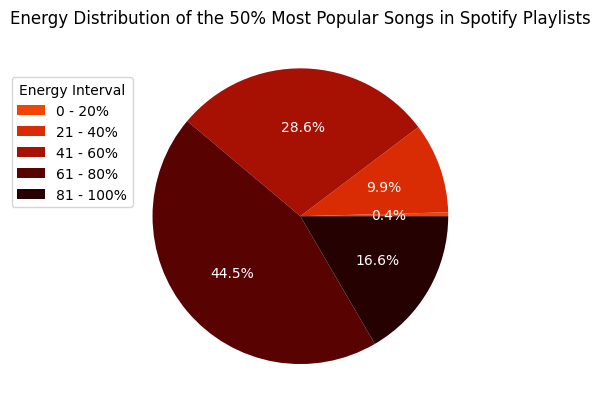

In [ ]:
# Graph to question 4 

labels = '0 - 20%', '21 - 40%', '41 - 60%', '61 - 80%', '81 - 100%' 
counter = count_e

fig, axs = plt.subplots()
axs.pie(counter, labels=labels, autopct='%1.1f%%', textprops= dict(color="w"), colors=['#F24405','#D92B04','#A61103','#590202','#260101'])
axs.set_title('Energy Distribution of the 50% Most Popular Songs in Spotify Playlists')
axs.legend(title='Energy Interval', loc= 'center left', bbox_to_anchor=(-0.3,0.7))

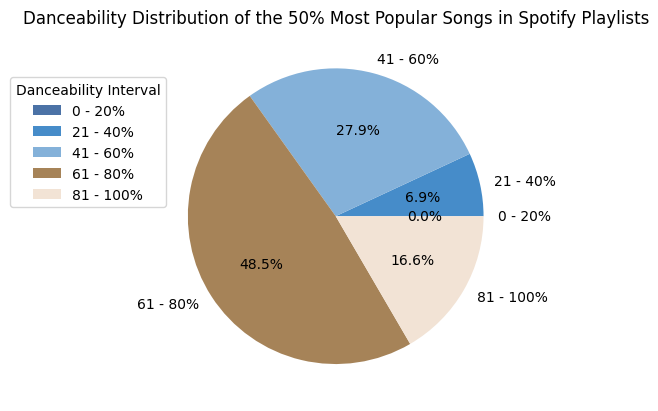

In [ ]:
# Graph to question 4

labels = '0 - 20%', '21 - 40%', '41 - 60%', '61 - 80%', '81 - 100%' 
counter_1 = count_d

fig, ax = plt.subplots()
ax.pie(counter_1, labels=labels, autopct='%1.1f%%', colors=['#4B72A6',"#468CC9",'#84B1D9','#A68358','#F2E3D5'])
ax.set_title('Danceability Distribution of the 50% Most Popular Songs in Spotify Playlists')
ax.legend(title='Danceability Interval', loc= 'center left', bbox_to_anchor=(-0.4,0.7))